In [81]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix
import warnings # current version generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

In [82]:
df = pd.read_csv(r"C:\Users\ksaik\Downloads\data.csv")
print(df.head())

   Duration  Pulse  Maxpulse  Calories
0        60    110       130     409.1
1        60    117       145     479.0
2        60    103       135     340.0
3        45    109       175     282.4
4        45    117       148     406.0


In [83]:
print(df.describe())


         Duration       Pulse    Maxpulse     Calories
count  169.000000  169.000000  169.000000   164.000000
mean    63.846154  107.461538  134.047337   375.790244
std     42.299949   14.510259   16.450434   266.379919
min     15.000000   80.000000  100.000000    50.300000
25%     45.000000  100.000000  124.000000   250.925000
50%     60.000000  105.000000  131.000000   318.600000
75%     60.000000  111.000000  141.000000   387.600000
max    300.000000  159.000000  184.000000  1860.400000


In [84]:
df.isnull().any()


Duration    False
Pulse       False
Maxpulse    False
Calories     True
dtype: bool

In [85]:
df.fillna(df.mean(), inplace=True)

In [86]:
df.agg({'Duration':['min','max','count','mean'],'Pulse':['min','max','count','mean']})


,Duration,Pulse
min,15.000000,80.000000
max,300.000000,159.000000
count,169.000000,169.000000
mean,63.846154,107.461538


In [87]:
df.loc[(df['Calories']>500)&(df['Calories']<1000)]


,Duration,Pulse,Maxpulse,Calories
51,80,123,146,643.1
62,160,109,135,853.0
65,180,90,130,800.4
66,150,105,135,873.4
67,150,107,130,816.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
90,180,101,127,600.1


In [88]:
df.loc[(df['Calories']>500)&(df['Pulse']<100)]


,Duration,Pulse,Maxpulse,Calories
65,180,90,130,800.4
70,150,97,129,1115.0
73,150,97,127,953.2
75,90,98,125,563.2
99,90,93,124,604.1
103,90,90,100,500.4
106,180,90,120,800.3
108,90,90,120,500.3


In [89]:
df_modified = df[['Duration','Pulse','Calories']]
df_modified.head()

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0


In [90]:
del df['Maxpulse']


In [91]:
df.head()


,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0


In [92]:
df.dtypes


Duration      int64
Pulse         int64
Calories    float64
dtype: object

In [93]:
df['Calories'] = df['Calories'].astype(np.int64)
df.dtypes

Duration    int64
Pulse       int64
Calories    int64
dtype: object

<AxesSubplot:xlabel='Duration', ylabel='Calories'>

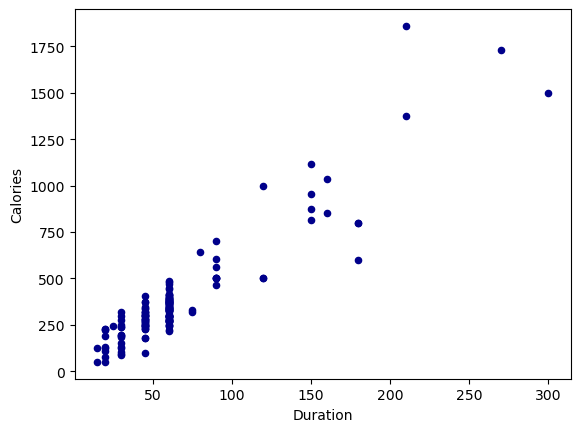

In [94]:
df.plot.scatter(x='Duration',y='Calories',c='DarkBlue')


In [95]:
df=pd.read_csv(r"C:\Users\ksaik\Downloads\vgsalesGlobale.csv\vgsalesGlobale.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [96]:
"""Titanic Dataset
1. Find the correlation between ‘survived’ (target column) and ‘sex’ column for the Titanic use case in class.
   a. Do you think we should keep this feature?
2. Do at least two visualizations to describe or show correlations.
3. Implement Naïve Bayes method using scikit-learn library and report the accuracy"""
from sklearn import preprocessing


In [97]:
df=pd.read_csv(r"C:\Users\ksaik\Downloads\Dataset\Dataset\train.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [98]:
#converted categorical data to numerical values for correlation calculation

label_encoder = preprocessing.LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df.Sex.values)


#Calculation of correlation for 'Survived' and  'Sex' in data
correlation_Value= df['Survived'].corr(df['Sex'])

print(correlation_Value)

-0.543351380657755


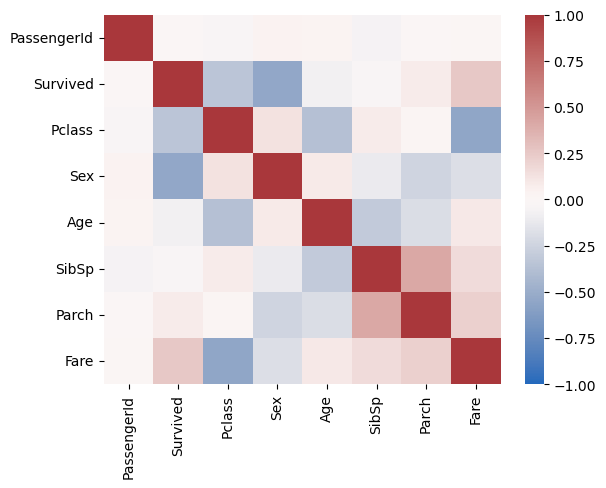

In [99]:
#2 2. Do at least two visualizations to describe or show correlations.
# using heatmap from seaborn
corr=df.corr()
sns.heatmap(corr, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

In [100]:
df.corr().style.background_gradient()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000


In [101]:
#3. Implement Naïve Bayes method using scikit-learn library and report the accuracy.


train_raw = pd.read_csv(r"C:\Users\ksaik\Downloads\Dataset\Dataset\train.csv")
test_raw = pd.read_csv(r"C:\Users\ksaik\Downloads\Dataset\Dataset\test.csv")
train_raw['train'] = 1
test_raw['train'] = 0
df = train_raw.append(test_raw, sort=False)
features = ['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp']
target = 'Survived'
df = df[features + [target] + ['train']]
df['Sex'] = df['Sex'].replace(["female", "male"], [0, 1])
df['Embarked'] = df['Embarked'].replace(['S', 'C', 'Q'], [1, 2, 3])
train = df.query('train == 1')
test = df.query('train == 0')
train.dropna(axis=0, inplace=True)
labels = train[target].values
train.drop(['train', target, 'Pclass'], axis=1, inplace=True)
test.drop(['train', target, 'Pclass'], axis=1, inplace=True)

In [102]:
#Test and train split
X_train, X_val, Y_train, Y_val = train_test_split(train, labels, test_size=0.25, random_state=1)
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_val)


# Summary of the predictions made by the classifier

print(classification_report(Y_val, y_pred))
print(confusion_matrix(Y_val, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(Y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.81      0.81       102
         1.0       0.74      0.72      0.73        76

    accuracy                           0.78       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.77      0.78      0.77       178

[[83 19]
 [21 55]]
accuracy is 0.7752808988764045


In [103]:
"""(Glass Dataset)
1. Implement Naïve Bayes method using scikit-learn library.
a. Use the glass dataset available in Link also provided in your assignment.
b. Use train_test_split to create training and testing part.
2. Evaluate the model on testing part using score and"""

# reading the dataset
glass=pd.read_csv(r"C:\Users\ksaik\Downloads\Dataset\Dataset\glass.csv")

features = ['Rl', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
target = 'Type'
X_train, X_val, Y_train, Y_val = train_test_split(glass[::-1], glass['Type'],test_size=0.25, random_state=1)
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_val)
# Summary of the predictions made by the classifier
print(classification_report(Y_val, y_pred))
print(confusion_matrix(Y_val, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(Y_val, y_pred))

              precision    recall  f1-score   support

           1       0.92      0.96      0.94        23
           2       0.94      0.94      0.94        16
           3       0.75      0.43      0.55         7
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1
           7       0.67      0.67      0.67         6

    accuracy                           0.83        54
   macro avg       0.71      0.66      0.68        54
weighted avg       0.86      0.83      0.84        54

[[22  1  0  0  0  0]
 [ 1 15  0  0  0  0]
 [ 1  0  3  2  0  1]
 [ 0  0  0  0  0  1]
 [ 0  0  0  0  1  0]
 [ 0  0  1  1  0  4]]
accuracy is 0.8333333333333334


In [104]:
classifier = LinearSVC()

classifier.fit(X_train, Y_train)


y_pred = classifier.predict(X_val)

# Summary of the predictions made by the classifier
print(classification_report(Y_val, y_pred))
print(confusion_matrix(Y_val, y_pred))
print('accuracy is',accuracy_score(Y_val, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.91      0.95        23
           2       0.48      1.00      0.65        16
           3       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         6

    accuracy                           0.69        54
   macro avg       0.25      0.32      0.27        54
weighted avg       0.57      0.69      0.60        54

[[21  2  0  0  0  0]
 [ 0 16  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  6  0  0  0  0]]
accuracy is 0.6851851851851852


In [105]:
glass.corr().style.background_gradient()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


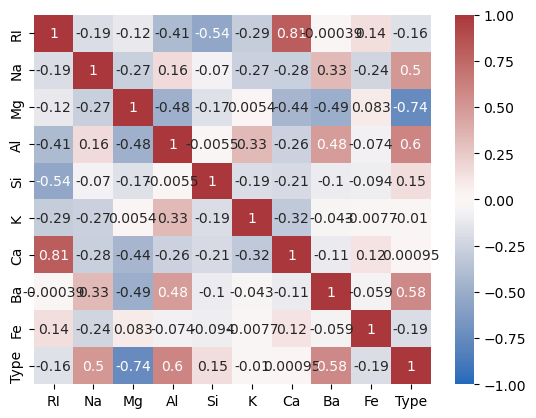

In [106]:

sns.heatmap(glass.corr(), annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

In [107]:
"""Which algorithm you got better accuracy? Can you justify why?
We can numerically conclude that Naive bayes is better than SVM because there is less correlation
in data and the accuracy is also higher
"""

'Which algorithm you got better accuracy? Can you justify why?\nWe can numerically conclude that Naive bayes is better than SVM because there is less correlation\nin data and the accuracy is also higher\n'